# Topic: Exploratory Data Analysis - Retail

# The Sparks Foundation #GRIPFEB21

# Name: Tanya Walia

# Exploratory Data Analysis

Exploratory data analysis is an approach for analyzing data sets to summarize their main characteristics, often with visual methods.

Lets start with importing our dependencies

In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

For EDA to be done , let's start with importing our Suprestore data

In [2]:
df=pd.read_csv("SampleSuperstore.csv")

Let's understand our data first

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


After exploring our data, we get to know that our data consists of 13 columns in total. 4 columns contains integer values. As it can be seen that our data have some outliers as well which can be seen in the 3 index above. so we first need to identify our ourliers and drop those rows.

In [6]:
df1=df[df["Profit"]<0]

In [7]:
df1.shape

(1871, 13)

Since we are facing loss in 1871 so let's drop those columns.

In [8]:
df.drop(df[df['Profit'] < 0].index, inplace = True)

In [9]:
df.shape

(8123, 13)

After droping the outliers now we have 8123 rows in our dataset

Text(0, 0.5, 'Frequency')

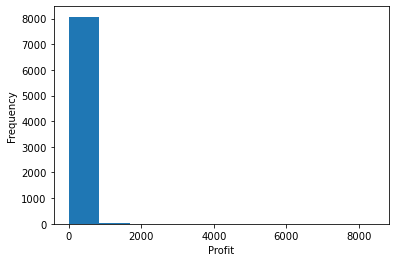

In [10]:
df['Profit'].plot(kind='hist')
plt.xlabel("Profit")
plt.ylabel("Frequency")

In [11]:
df["Country"].value_counts()

United States    8123
Name: Country, dtype: int64

In [12]:
df["Region"].value_counts()

West       2885
East       2295
Central    1582
South      1361
Name: Region, dtype: int64

In [13]:
df["Region"].replace({"West": "1", "East": "2", "Central": "3", "South": "4"}, inplace=True)

In [14]:
df=df.astype({'Region':int})

Text(0.5, 0, 'Region')

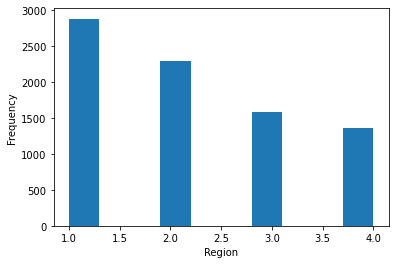

In [15]:
df['Region'].plot(kind='hist')
plt.xlabel("Region")

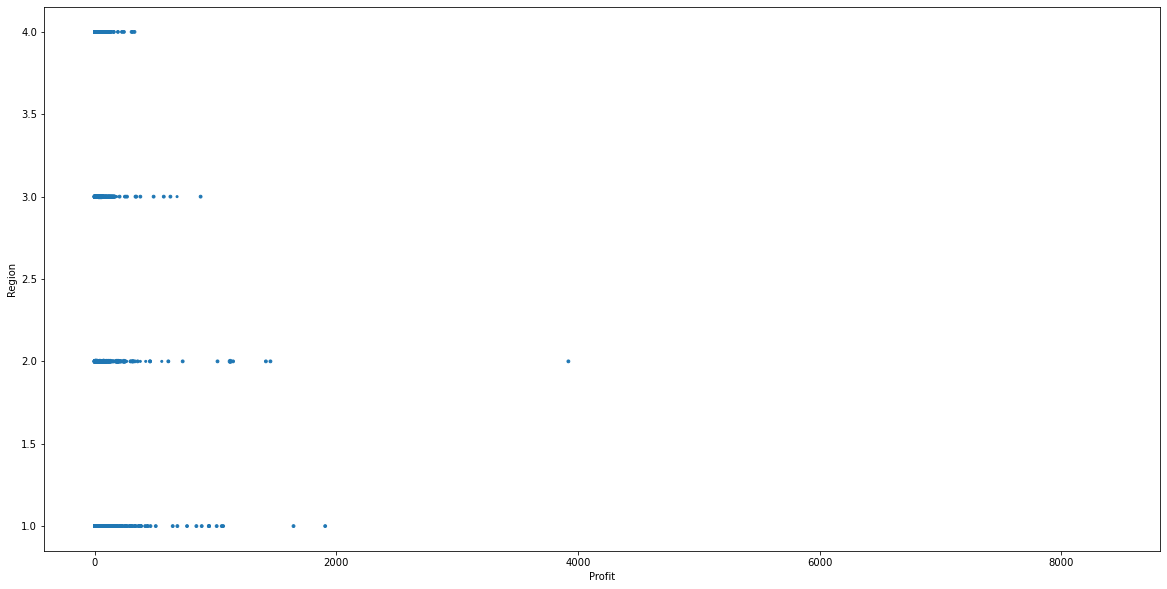

In [16]:
df.plot(kind='scatter',x='Profit',y='Region',s=df['Discount']*40,figsize=(20,10))

# As we can see on the basis of discount we have our maximum sales in East region of United States

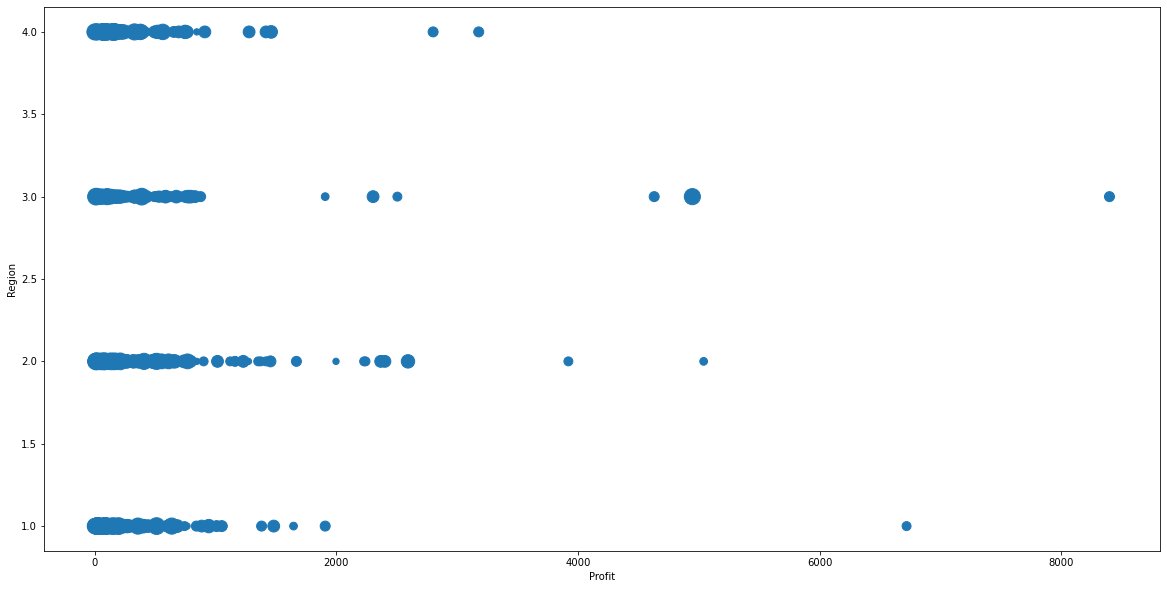

In [17]:
df.plot(kind='scatter',x='Profit',y='Region',s=df['Quantity']*20,figsize=(20,10))

# Similarly on the basis of Quantity as well we have the Central region on top in terms of profit

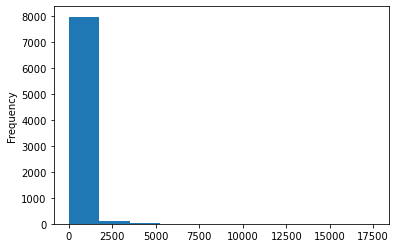

In [18]:
df['Sales'].plot(kind='hist', bins=10)

Text(0.5, 0, 'Quantity')

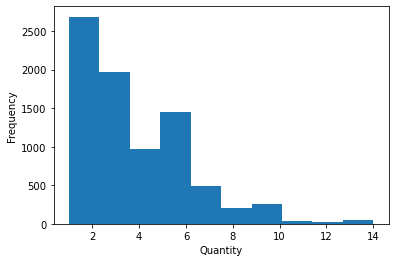

In [19]:
df['Quantity'].plot(kind='hist', bins=10)
plt.xlabel("Quantity")

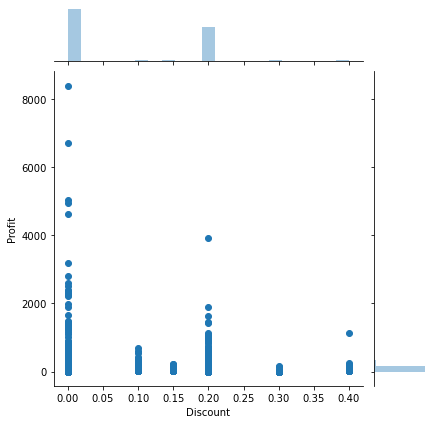

In [20]:
sns.jointplot('Discount','Profit',data=df)

# It is observed that if there is no discount then profit rate is high as compared to when there is a discount on any product

# The weakest area where we need to work hard is the West area in terms of Quantity of United States where we need to sell more products In order to make more profit.